In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame,Series

In [19]:
# seed 부여
np.random.seed(20181106)

# 갯수, 평균, 편차
n0,mu0,variance0 = 800,[10,11],20
data0 = multivariate_normal(mu0,np.eye(2)*variance0,n0)
df0 = DataFrame(data0,columns=['x','y'])
df0['t'] = 0

In [20]:
n1,mu1,variance1 = 600,[18,20],22
data1 = multivariate_normal(mu1,np.eye(2)*variance1,n1)
df1 = DataFrame(data1,columns=['x','y'])
df1['t'] = 1

In [21]:
df = pd.concat([df0,df1], ignore_index = True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

In [22]:
num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]

In [23]:
test_set

,x,y,t
1120,11.283847,4.190503,0
1121,0.857403,11.770471,0
1122,3.944348,15.065452,0
1123,12.180188,20.370425,1
1124,3.128992,3.171777,0
1125,8.973828,18.032271,0
1126,14.440820,18.511048,1
1127,12.763734,24.806477,1
1128,8.880069,7.801963,0
1129,0.686020,12.046374,0


In [24]:
train_x = train_set[['x','y']].values
train_t = train_set['t'].values.reshape([len(train_set),1])
test_x = test_set[['x','y']].values
test_t = test_set['t'].values.reshape([len(test_set),1])

In [25]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x, w) + w0
p = tf.sigmoid(f)
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [26]:
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [28]:
train_accuracy = []
test_accuracy = []
for _ in range(2500):
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    acc_val1 = sess.run(accuracy,feed_dict={x:train_x,t:train_t})
    train_accuracy.append(acc_val1)
    acc_val2 = sess.run(accuracy,feed_dict={x:test_x,t:test_t})
    test_accuracy.append(acc_val2)
    print('%f %f'%(acc_val1,acc_val2))

0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.428571
0.428571 0.432143
0.428571 0.432143
0.428571 0.432143
0.428571 0.432143
0.428571 0.432143
0.429464 0.432143
0.429464 0.432143
0.429464 0.432143
0.429464 0.432143
0.429464 0.432143
0.429464 0.432143
0.429464 0.432143
0.429464 0.432143
0.429464 0.432143
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.435714
0.429464 0.439286
0.430357 0.439286
0.431250 0.439286
0.431250 0

0.685714 0.692857
0.685714 0.692857
0.686607 0.692857
0.686607 0.692857
0.687500 0.696429
0.688393 0.696429
0.689286 0.696429
0.690179 0.696429
0.691071 0.696429
0.692857 0.696429
0.692857 0.696429
0.693750 0.696429
0.693750 0.696429
0.694643 0.696429
0.694643 0.700000
0.694643 0.700000
0.694643 0.703571
0.695536 0.703571
0.695536 0.703571
0.695536 0.703571
0.696429 0.703571
0.696429 0.703571
0.696429 0.703571
0.696429 0.703571
0.696429 0.703571
0.697321 0.703571
0.698214 0.710714
0.698214 0.710714
0.698214 0.710714
0.699107 0.710714
0.699107 0.710714
0.699107 0.710714
0.700000 0.710714
0.700000 0.710714
0.701786 0.710714
0.702679 0.714286
0.702679 0.717857
0.702679 0.717857
0.702679 0.721429
0.702679 0.721429
0.702679 0.721429
0.702679 0.721429
0.704464 0.721429
0.705357 0.721429
0.706250 0.725000
0.707143 0.725000
0.707143 0.725000
0.707143 0.728571
0.708036 0.728571
0.708036 0.728571
0.708036 0.728571
0.708929 0.728571
0.708929 0.728571
0.710714 0.728571
0.710714 0.728571
0.710714 0

0.827679 0.839286
0.827679 0.839286
0.827679 0.842857
0.828571 0.842857
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.846429
0.829464 0.850000
0.829464 0.850000
0.829464 0.850000
0.829464 0.853571
0.829464 0.857143
0.829464 0.857143
0.829464 0.857143
0.829464 0.857143
0.829464 0.857143
0.829464 0.857143
0.830357 0.857143
0.831250 0.857143
0.830357 0.857143
0.830357 0.857143
0.830357 0.857143
0.830357 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.860714
0.831250 0.864286
0.831250 0.864286
0.831250 0.864286
0.831250 0.864286
0.831250 0.864286
0.831250 0.864286
0.832143 0.864286
0.832143 0.864286
0.832143 0.864286
0.832143 0.864286
0.832143 0

0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.900000
0.867857 0.896429
0.867857 0.896429
0.867857 0.896429
0.867857 0.896429
0.867857 0.896429
0.867857 0.896429
0.868750 0.896429
0.869643 0.896429
0.869643 0.896429
0.869643 0.896429
0.869643 0.896429
0.869643 0.896429
0.869643 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0.896429
0.868750 0

0.888393 0.903571
0.888393 0.903571
0.888393 0.903571
0.888393 0.903571
0.888393 0.903571
0.888393 0.903571
0.888393 0.903571
0.889286 0.903571
0.889286 0.903571
0.889286 0.903571
0.889286 0.903571
0.889286 0.903571
0.889286 0.903571
0.891071 0.903571
0.891071 0.903571
0.891071 0.903571
0.891071 0.903571
0.891964 0.903571
0.891964 0.903571
0.891964 0.903571
0.891964 0.903571
0.891964 0.903571
0.891964 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.892857 0.903571
0.893750 0.903571
0.893750 0.903571
0.894643 0.903571
0.894643 0.903571
0.894643 0.903571
0.894643 0.903571
0.894643 0.903571
0.894643 0.903571
0.894643 0.903571
0.895536 0

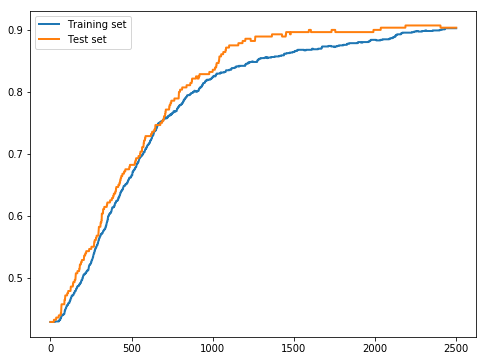

In [29]:
fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(train_accuracy)),train_accuracy,linewidth=2,label='Training set')
subplot.plot(range(len(test_accuracy)),test_accuracy,linewidth=2,label='Test set')
subplot.legend(loc='upper left')
plt.show()